In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Problem Statement 7: (Process the relevant data)

In [14]:
housing_data = pd.read_csv("Data/housing data.csv")
census_data = pd.read_csv("Clean Data/census.csv")

In [16]:
merged_data = pd.merge(housing_data, census_data, on='District Name')

In [17]:
merged_data.head()

,State Code,State Name,District Code,District Name,Tehsil Code,Tehsil Name,Town Code/Village code,Ward No,Area Name,Rural/Urban,...,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Rural,...,439654.0,282823.0,156831.0,158438.0,172714.756178,181664.0,600759.0,178435.0,89679.0,1481.0
1,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Total,...,439654.0,282823.0,156831.0,158438.0,172714.756178,181664.0,600759.0,178435.0,89679.0,1481.0
2,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Urban,...,439654.0,282823.0,156831.0,158438.0,172714.756178,181664.0,600759.0,178435.0,89679.0,1481.0
3,1,JAMMU & KASHMIR,2,Badgam,0,Badgam,0,0,District - Badgam,Rural,...,335649.0,207741.0,127908.0,160649.0,27190.000000,187839.0,503223.0,160933.0,88978.0,611.0
4,1,JAMMU & KASHMIR,2,Badgam,0,Badgam,0,0,District - Badgam,Total,...,335649.0,207741.0,127908.0,160649.0,27190.000000,187839.0,503223.0,160933.0,88978.0,611.0


In [18]:
merged_data.to_csv('Clean Data\merged_data.csv', index=False)

In [19]:
merged_data['Households_Rural_Dilapidated'] = merged_data['Total Number of Residence Dilapidated'] * merged_data['Total Number of Residence households'] / 100
merged_data['Households_Rural_Toilet_Premise'] = merged_data['Latrine_OS'] * merged_data['Total Number of Residence households'] / 100

In [21]:
merged_data['Households_Urban'] = merged_data['Households'] - merged_data['Households_Rural']
merged_data['Households_Urban_Livable'] = merged_data['Households'] - merged_data['Households_Rural']

In [22]:
merged_data.rename(columns={
                            'Total Number of Residence Livable': 'Households_Rural_Livable',
                            'Total Number of Residence Dilapidated': 'Households_Rural_Dilapidated',
                            'Latrine_PSS': 'Households_Rural_Toilet_Premise',
                            'Households': 'Total_Households'},
                   inplace=True)

In [23]:
merged_data.fillna(0, inplace=True)

In [24]:
merged_data.to_csv('Clean Data/housing.csv', index=False)

<Figure size 1800x1400 with 0 Axes>

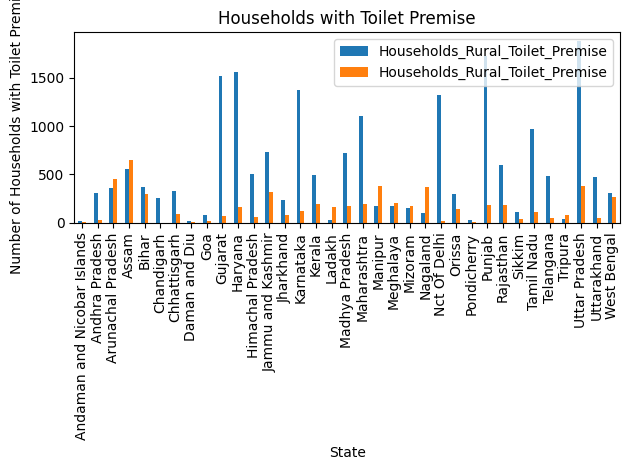

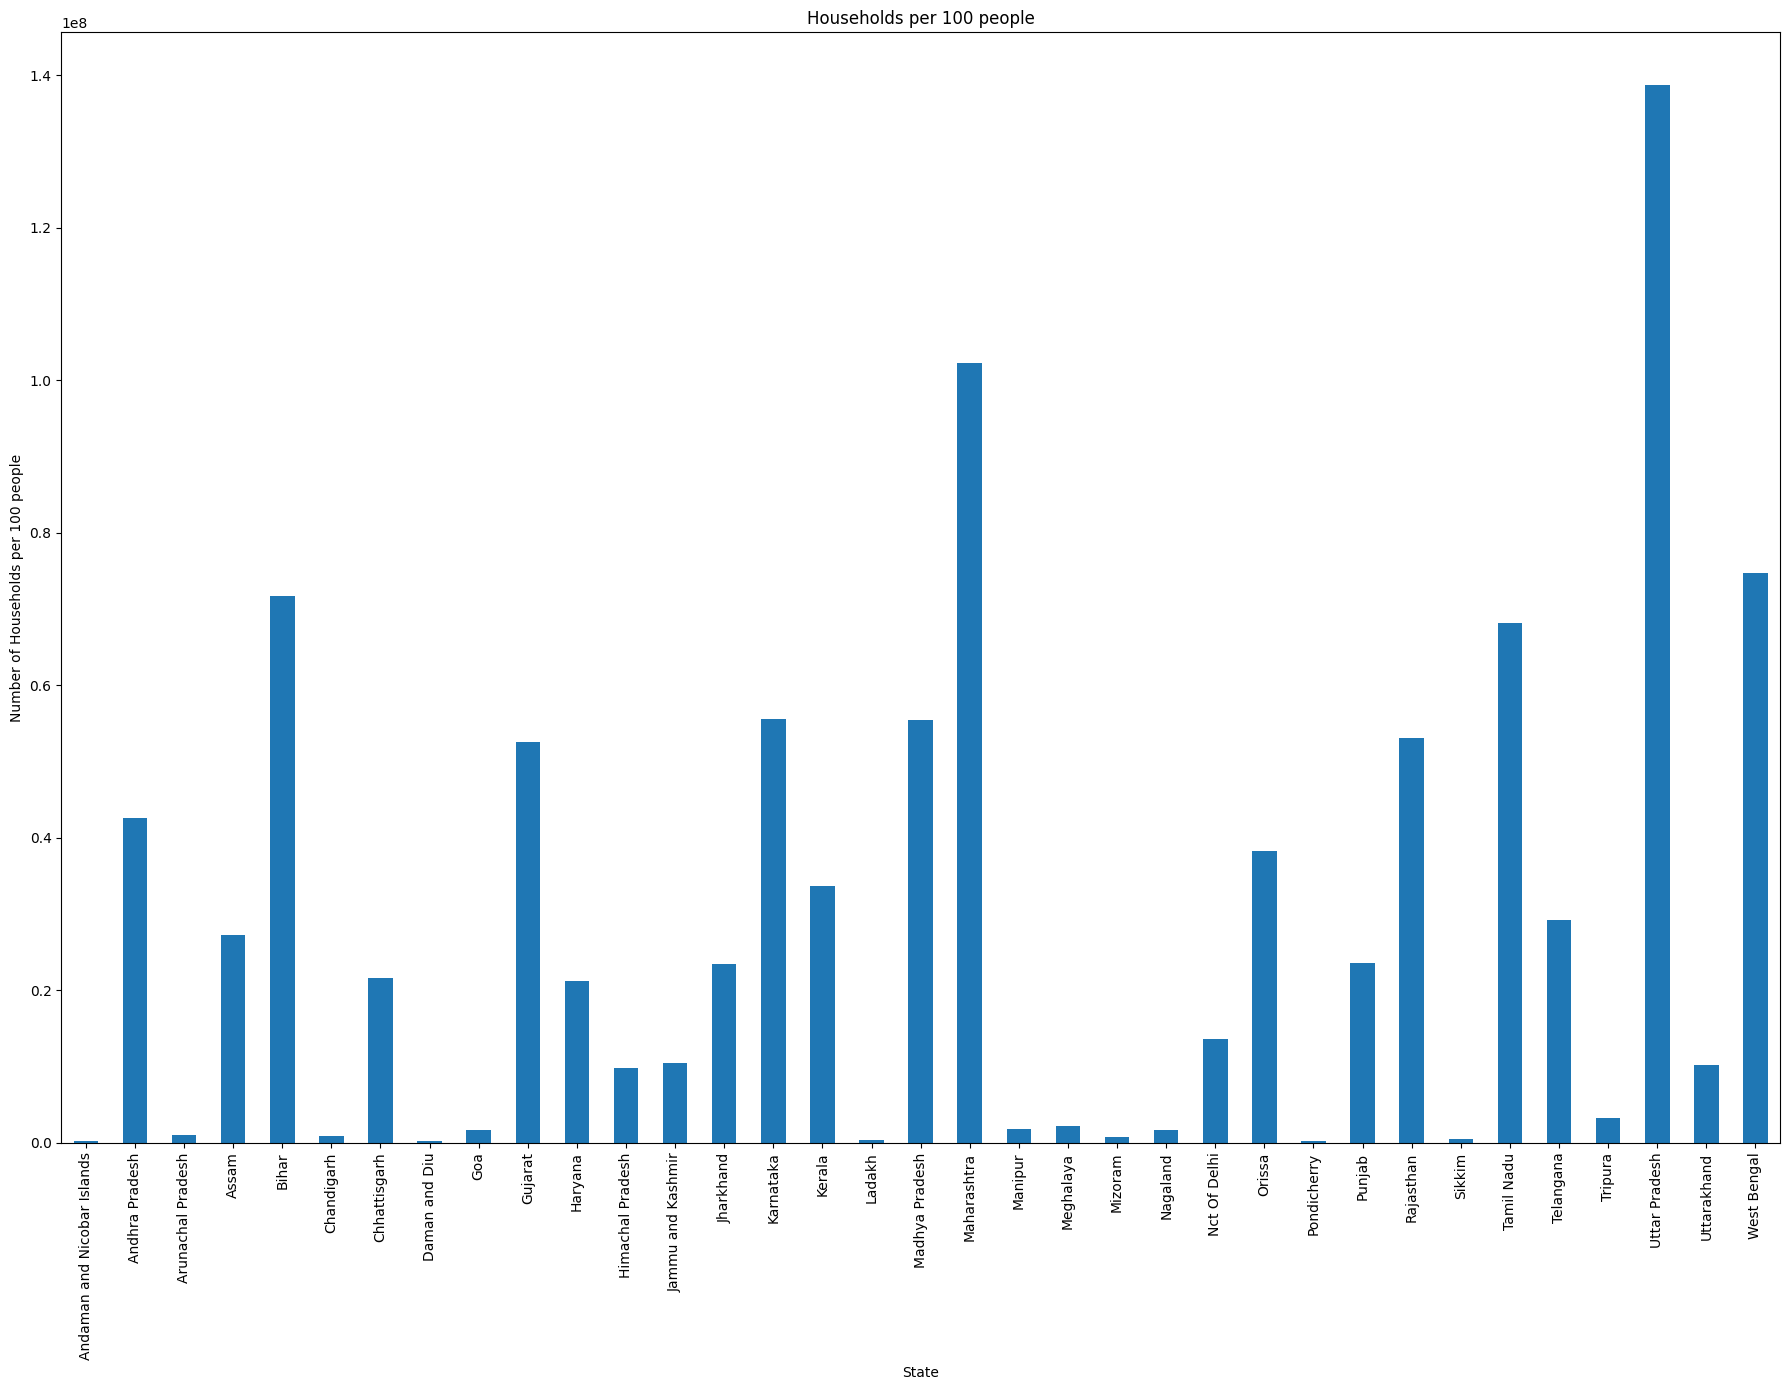

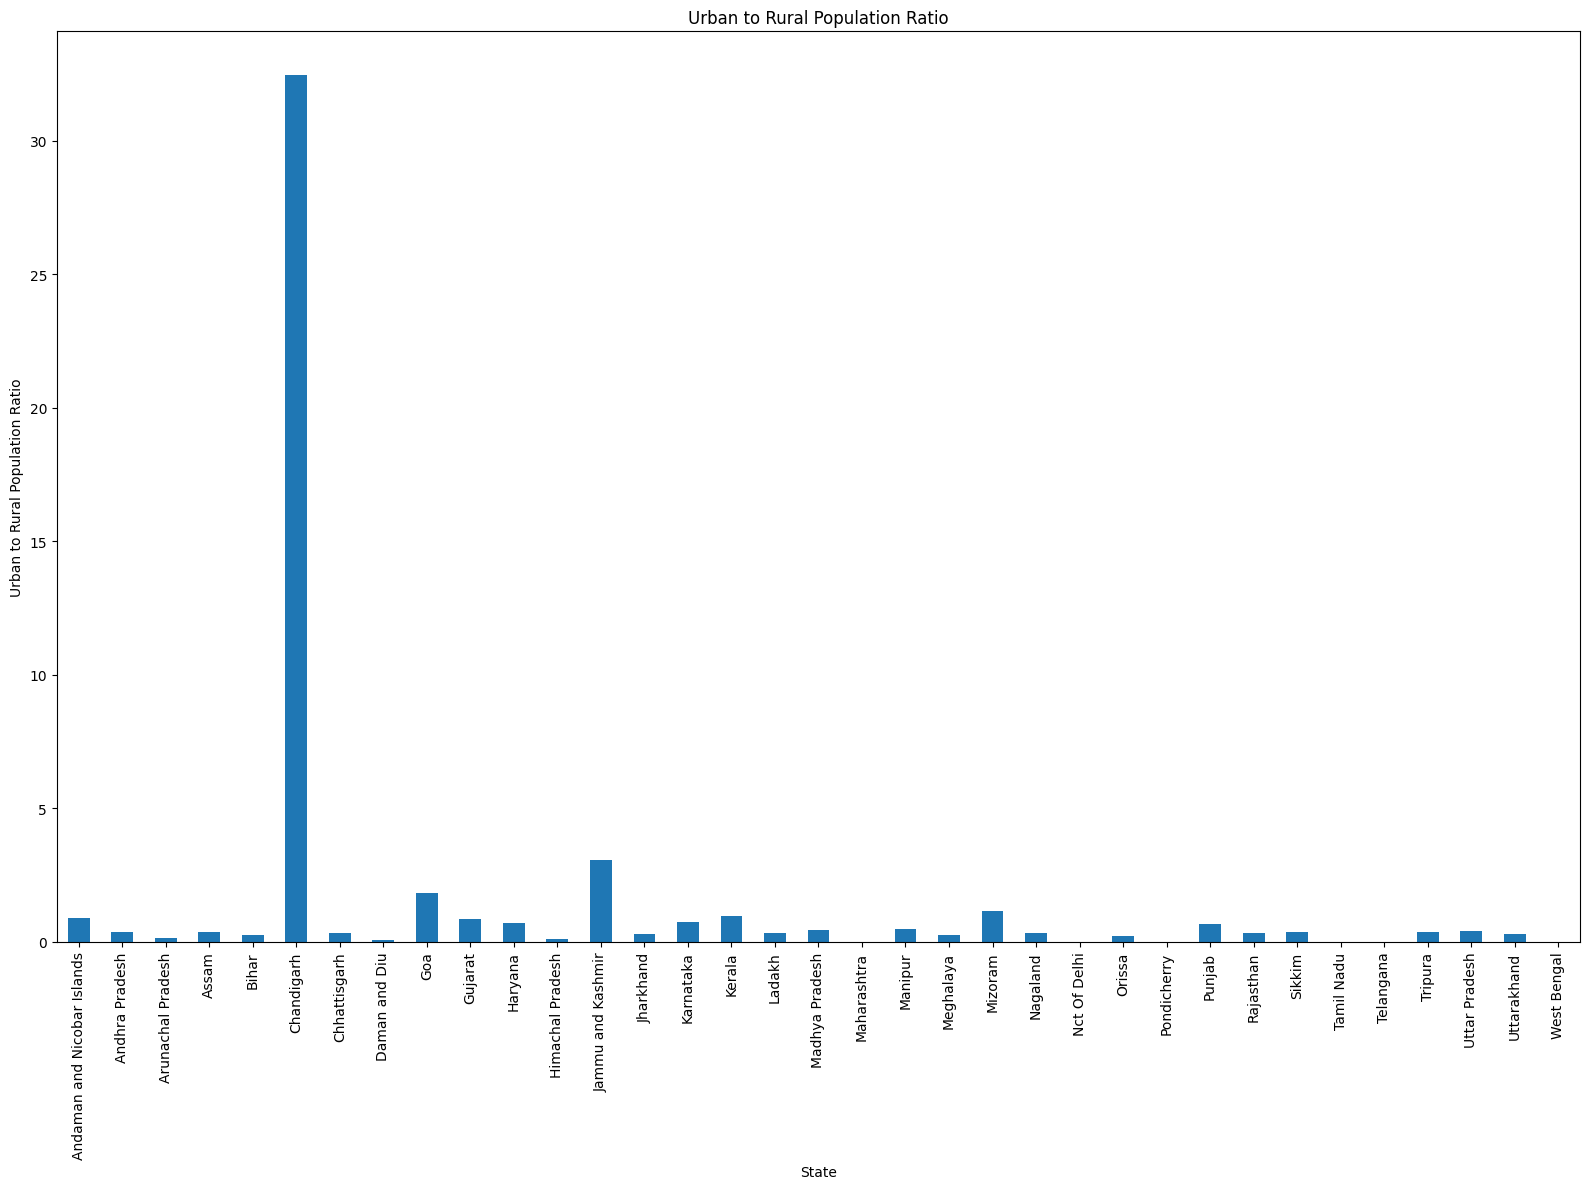

In [25]:
# Problem Statement 8: Visualize the housing data

# Graph 1: Households with Toilet Premise
plt.figure(figsize=(18, 14))
merged_data.groupby('State/UT')['Households_Rural_Toilet_Premise'].sum().plot(kind='bar', title='Households with Toilet Premise')
plt.xlabel('State')
plt.ylabel('Number of Households with Toilet Premise')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Graph 2: Households per 100 people
plt.figure(figsize=(18, 14))
merged_data.groupby('State/UT')['Total_Households'].sum().plot(kind='bar', title='Households per 100 people')
plt.xlabel('State')
plt.ylabel('Number of Households per 100 people')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Graph 3: Urban to Rural Population Ratio
plt.figure(figsize=(16, 12))
merged_data['Urban_to_Rural_Population_Ratio'] = merged_data['Households_Urban'] / merged_data['Households_Rural']
merged_data.groupby('State/UT')['Urban_to_Rural_Population_Ratio'].mean().plot(kind='bar', title='Urban to Rural Population Ratio')
plt.xlabel('State')
plt.ylabel('Urban to Rural Population Ratio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [27]:
# Calculate the absolute difference between rural and urban households
merged_data['Households_Rural_Difference'] = merged_data['Households_Rural'] - merged_data['Households_Urban']

# Calculate the percentage difference
merged_data['Percentage_Difference'] = (merged_data['Households_Rural_Difference'] / merged_data['Households_Rural']) * 100

# Identify districts with major differences in rural households
major_difference_districts = merged_data[abs(merged_data['Percentage_Difference']) > 10]

# Print districts with major differences in rural households for each state
for state, state_data in major_difference_districts.groupby('State/UT'):
    print(f"Districts with major differences in rural households in {state}:")
    for index, row in state_data.iterrows():
        print(f"District: {row['District Name']}, Percentage Difference: {row['Percentage_Difference']:.2f}%")
    print("\n")


Districts with major differences in rural households in Andaman and Nicobar Islands:
District: Nicobars, Percentage Difference: 100.00%
District: Nicobars, Percentage Difference: 100.00%
District: South Andaman, Percentage Difference: -45.07%
District: South Andaman, Percentage Difference: -45.07%
District: South Andaman, Percentage Difference: -45.07%


Districts with major differences in rural households in Andhra Pradesh:
District: Srikakulam, Percentage Difference: 80.12%
District: Srikakulam, Percentage Difference: 80.12%
District: Srikakulam, Percentage Difference: 80.12%
District: Vizianagaram, Percentage Difference: 73.49%
District: Vizianagaram, Percentage Difference: 73.49%
District: Vizianagaram, Percentage Difference: 73.49%
District: East Godavari, Percentage Difference: 66.12%
District: East Godavari, Percentage Difference: 66.12%
District: East Godavari, Percentage Difference: 66.12%
District: West Godavari, Percentage Difference: 75.34%
District: West Godavari, Percenta